<a href="https://colab.research.google.com/github/TANVIPADAVE/Codetech_internship/blob/main/FRAUD_DETECTION_IN_FINANCIAL_TRANSACTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the dataset
num_samples = 1000
num_fraudulent = 50  # Number of fraudulent transactions

# Generate synthetic transaction data
data = {
    'TransactionID': np.arange(num_samples),
    'Amount': np.random.normal(loc=100, scale=50, size=num_samples).clip(0),  # Amounts cannot be negative
    'TransactionTime': pd.date_range(start='2023-01-01', periods=num_samples, freq='H'),
    'Merchant': np.random.choice(['Merchant_A', 'Merchant_B', 'Merchant_C'], size=num_samples),
    'UserID': np.random.randint(1, 200, size=num_samples),
}

# Create DataFrame
df = pd.DataFrame(data)

# Introduce fraudulent transactions (randomly change some legitimate transactions)
fraud_indices = np.random.choice(num_samples, size=num_fraudulent, replace=False)
df.loc[fraud_indices, 'Amount'] *= 5  # Increase amount for fraudulent transactions
df.loc[fraud_indices, 'IsFraud'] = 1  # Mark as fraud
df['IsFraud'] = df.get('IsFraud', 0)  # Mark legitimate transactions

# Save to CSV
df.to_csv('synthetic_financial_transactions.csv', index=False)
print("Synthetic data generated and saved as 'synthetic_financial_transactions.csv'")


Synthetic data generated and saved as 'synthetic_financial_transactions.csv'


In [3]:
from google.colab import files
files.download('synthetic_financial_transactions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the dataset
num_samples = 1000
num_fraudulent = 50  # Number of fraudulent transactions

# Generate synthetic transaction data
data = {
    'TransactionID': np.arange(num_samples),
    'Amount': np.random.normal(loc=100, scale=50, size=num_samples).clip(0),  # Amounts cannot be negative
    'TransactionTime': pd.date_range(start='2023-01-01', periods=num_samples, freq='H'),
    'Merchant': np.random.choice(['Merchant_A', 'Merchant_B', 'Merchant_C'], size=num_samples),
    'UserID': np.random.randint(1, 200, size=num_samples),
}

# Create DataFrame
df = pd.DataFrame(data)

# Introduce fraudulent transactions (randomly change some legitimate transactions)
fraud_indices = np.random.choice(num_samples, size=num_fraudulent, replace=False)
df.loc[fraud_indices, 'Amount'] *= 5  # Increase amount for fraudulent transactions
df.loc[fraud_indices, 'IsFraud'] = 1  # Mark as fraud
df['IsFraud'] = df.get('IsFraud', 0)  # Mark legitimate transactions

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   TransactionID      Amount     TransactionTime    Merchant  UserID  IsFraud
0              0  124.835708 2023-01-01 00:00:00  Merchant_C     113      NaN
1              1   93.086785 2023-01-01 01:00:00  Merchant_A      94      NaN
2              2  132.384427 2023-01-01 02:00:00  Merchant_C     118      NaN
3              3  176.151493 2023-01-01 03:00:00  Merchant_A     198      NaN
4              4   88.292331 2023-01-01 04:00:00  Merchant_C      81      NaN


In [8]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check the distribution of the target variable (IsFraud)
fraud_distribution = df['IsFraud'].value_counts(normalize=True) * 100
print("\nDistribution of Fraudulent Transactions (as percentage):")
print(fraud_distribution)



Missing values in each column:
TransactionID        0
Amount               0
TransactionTime      0
Merchant             0
UserID               0
IsFraud            950
dtype: int64

Summary statistics of the dataset:
       TransactionID       Amount                TransactionTime       UserID  \
count    1000.000000  1000.000000                           1000  1000.000000   
mean      499.500000   121.917196  2023-01-21 19:29:59.999999744   102.575000   
min         0.000000     0.000000            2023-01-01 00:00:00     1.000000   
25%       249.750000    69.983883            2023-01-11 09:45:00    52.750000   
50%       499.500000   103.534208            2023-01-21 19:30:00   106.000000   
75%       749.250000   137.415849            2023-02-01 05:15:00   153.000000   
max       999.000000  1131.733106            2023-02-11 15:00:00   199.000000   
std       288.819436   119.861373                            NaN    57.199407   

       IsFraud  
count     50.0  
mean       1.0  


In [9]:
# 1. Fill missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill for demonstration; you can choose a suitable method

# 2. Encode categorical variables
df = pd.get_dummies(df, columns=['Merchant'], drop_first=True)

# 3. Feature scaling
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop(['TransactionID', 'TransactionTime', 'IsFraud'], axis=1)
y = df['IsFraud']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the scaled features
print("Scaled Features (first 5 rows):")
print(X_scaled[:5])


<ipython-input-9-c335b323ec48>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill for demonstration; you can choose a suitable method


Scaled Features (first 5 rows):
[[ 0.02436124  0.18234833 -0.7273596   1.47465358]
 [-0.24065165 -0.14998916 -0.7273596  -0.67812537]
 [ 0.0873715   0.26980556 -0.7273596   1.47465358]
 [ 0.45270159  1.6691213  -0.7273596  -0.67812537]
 [-0.28067166 -0.37737796 -0.7273596   1.47465358]]


In [10]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (800, 4)
Testing set size: (200, 4)


In [11]:
from sklearn.ensemble import IsolationForest

# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination based on your dataset
iso_forest.fit(X_train)

# Predict anomalies
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]  # Convert -1 (anomaly) to 1, 1 (normal) to 0


In [15]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the dataset
num_samples = 1000
num_fraudulent = 50  # Number of fraudulent transactions

# Generate synthetic transaction data
data = {
    'TransactionID': np.arange(num_samples),
    'Amount': np.random.normal(loc=100, scale=50, size=num_samples).clip(0),  # Amounts cannot be negative
    'TransactionTime': pd.date_range(start='2023-01-01', periods=num_samples, freq='H'),
    'Merchant': np.random.choice(['Merchant_A', 'Merchant_B', 'Merchant_C'], size=num_samples),
    'UserID': np.random.randint(1, 200, size=num_samples),
}

# Create DataFrame
df = pd.DataFrame(data)

# Initialize IsFraud column to 0 (not fraudulent)
df['IsFraud'] = 0

# Introduce fraudulent transactions (randomly change some legitimate transactions)
fraud_indices = np.random.choice(num_samples, size=num_fraudulent, replace=False)
df.loc[fraud_indices, 'Amount'] *= 5  # Increase amount for fraudulent transactions
df.loc[fraud_indices, 'IsFraud'] = 1  # Mark as fraud

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   TransactionID      Amount     TransactionTime    Merchant  UserID  IsFraud
0              0  124.835708 2023-01-01 00:00:00  Merchant_C     113        0
1              1   93.086785 2023-01-01 01:00:00  Merchant_A      94        0
2              2  132.384427 2023-01-01 02:00:00  Merchant_C     118        0
3              3  176.151493 2023-01-01 03:00:00  Merchant_A     198        0
4              4   88.292331 2023-01-01 04:00:00  Merchant_C      81        0


In [16]:
# Fill missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill for demonstration

# Encode categorical variables
df = pd.get_dummies(df, columns=['Merchant'], drop_first=True)

# Separate features and target variable
X = df.drop(['TransactionID', 'TransactionTime', 'IsFraud'], axis=1)
y = df['IsFraud']

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check for NaN values in y_test again
print("Checking for NaN values in y_test after split:")
print("NaN in y_test:", np.any(np.isnan(y_test)))


Checking for NaN values in y_test after split:
NaN in y_test: False


<ipython-input-16-00e562b230cc>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill for demonstration


In [17]:
from sklearn.ensemble import IsolationForest

# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination based on your dataset
iso_forest.fit(X_train)

# Predict anomalies
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]  # Convert -1 (anomaly) to 1, 1 (normal) to 0

# Evaluate the model
print("Isolation Forest Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_iso))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_iso))


Isolation Forest Performance:
Confusion Matrix:
[[181   3]
 [  3  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.81      0.81      0.81        16

    accuracy                           0.97       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.97      0.97      0.97       200



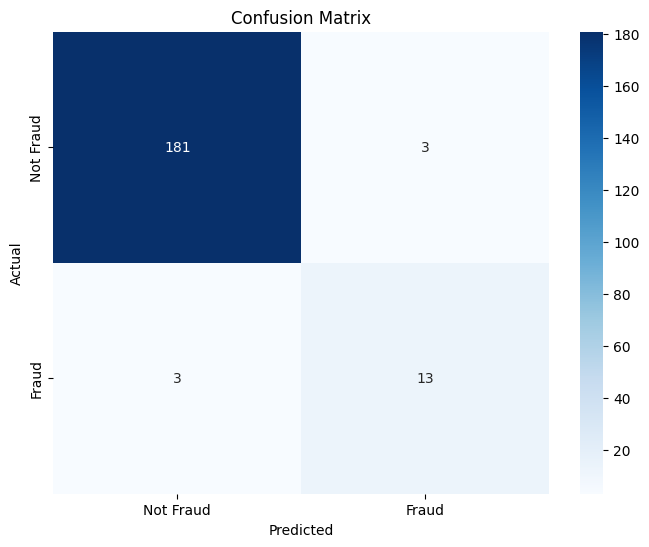

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_iso)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


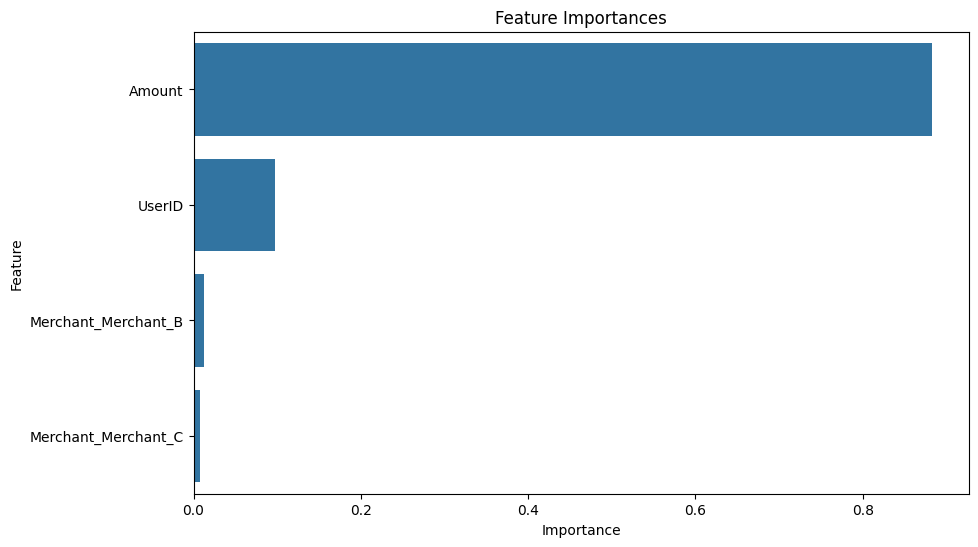

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model for feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()
